# Import Library & Data

## Import Library

In [3]:
# Importing Library
import os
import random

# For Data Processing
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

# For ML models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC ,SVR
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Import Data

In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
# Importing data from drive
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/portfolio/Breast_cancer_data.csv') #, index_col='ID')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


# Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [7]:
# Column Statistics
df.describe()[1:][['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
mean,14.127292,19.289649,91.969033,654.889104,0.096360
std,3.524049,4.301036,24.298981,351.914129,0.014064
min,6.981000,9.710000,43.790000,143.500000,0.052630
25%,11.700000,16.170000,75.170000,420.300000,0.086370
50%,13.370000,18.840000,86.240000,551.100000,0.095870
75%,15.780000,21.800000,104.100000,782.700000,0.105300
max,28.110000,39.280000,188.500000,2501.000000,0.163400


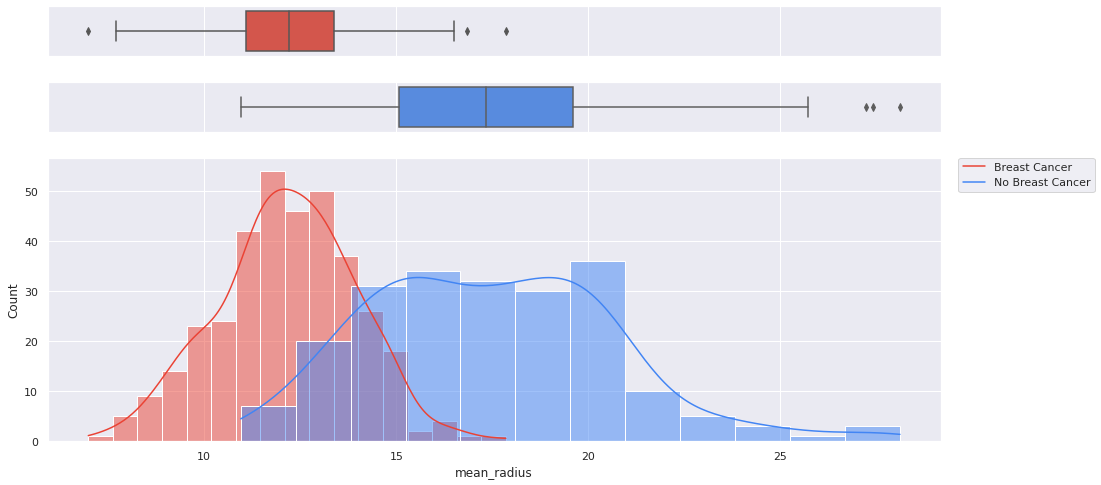

In [11]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
 
# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
# assigning a graph to each ax
sns.boxplot(x=df[df['diagnosis']==1]["mean_radius"], ax=ax_box1, color="#ea4335")
sns.histplot(df[df['diagnosis']==1], x="mean_radius", ax=ax_hist, kde=True, color="#ea4335")

sns.boxplot(x=df[df['diagnosis']==0]["mean_radius"], ax=ax_box2, color='#4285f4')
sns.histplot(df[df['diagnosis']==0], x="mean_radius", ax=ax_hist, kde=True, color='#4285f4')
 
# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['Breast Cancer', 'No Breast Cancer'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

Mean radius of patients with breas cancer are lower than those who never had breast cancer

# Machine Learning Models

Spliting training & testing data

(80% train data & 20% test data)

In [12]:
features = np.array(df[[col for col in df.columns if col!='diagnosis']])
labels = np.array(df['diagnosis'])

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

In [21]:
model_comparison = {}

## SVM

In [22]:
parameters = {'C': [1,2,3,4,5,6], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

svc_model = SVC()

clf = GridSearchCV(svc_model, parameters)
print("Searching for best hyperparameters ...")
clf.fit(x_train, y_train)
print(f'Best Hyperparameters: {clf.best_params_}')

y_pred = clf.predict(x_test)
model_comparison['SVM'] = [accuracy_score(y_test,y_pred), f1_score(y_test,y_pred, average='weighted')]
print('\n')
print(classification_report(y_test,y_pred, zero_division=1, digits=3))

Searching for best hyperparameters ...
Best Hyperparameters: {'C': 3, 'kernel': 'linear'}


              precision    recall  f1-score   support

           0      0.878     0.915     0.896        47
           1      0.938     0.910     0.924        67

    accuracy                          0.912       114
   macro avg      0.908     0.913     0.910       114
weighted avg      0.913     0.912     0.913       114



## Random Forest

In [23]:
parameters = {'n_estimators': [160,180,200,220], 'max_depth':[16,18,20,22,24]}

rf = RandomForestClassifier()

clf = GridSearchCV(rf, parameters)
print("Searching for best hyperparameters ...")
clf.fit(x_train, y_train)
print(f'Best Hyperparameters: {clf.best_params_}')

y_pred = clf.predict(x_test)
model_comparison['RandomForest'] = [accuracy_score(y_test,y_pred), f1_score(y_test,y_pred, average='weighted')]
print('\n')
print(classification_report(y_test,y_pred, zero_division=1, digits=3))

Searching for best hyperparameters ...
Best Hyperparameters: {'max_depth': 22, 'n_estimators': 160}


              precision    recall  f1-score   support

           0      0.933     0.894     0.913        47
           1      0.928     0.955     0.941        67

    accuracy                          0.930       114
   macro avg      0.930     0.924     0.927       114
weighted avg      0.930     0.930     0.930       114



## KNN

In [24]:
parameters = {'n_neighbors': [5,10,15,20]}

K_model = KNeighborsClassifier()

clf = GridSearchCV(K_model, parameters)
print("Searching for best hyperparameters ...")
clf.fit(x_train, y_train)
print(f'Best Hyperparameters: {clf.best_params_}')

y_pred = clf.predict(x_test)
model_comparison['KNN'] = [accuracy_score(y_test,y_pred), f1_score(y_test,y_pred, average='weighted')]
print('\n')
print(classification_report(y_test,y_pred, zero_division=1, digits=3))

Searching for best hyperparameters ...
Best Hyperparameters: {'n_neighbors': 20}


              precision    recall  f1-score   support

           0      0.929     0.830     0.876        47
           1      0.889     0.955     0.921        67

    accuracy                          0.904       114
   macro avg      0.909     0.893     0.899       114
weighted avg      0.905     0.904     0.903       114



## Decision Tree

In [25]:
parameters = {'max_depth': [1,2,3,4,5,6]}

Tree_model = DecisionTreeClassifier()

clf = GridSearchCV(Tree_model, parameters)
print("Searching for best hyperparameters ...")
clf.fit(x_train, y_train)
print(f'Best Hyperparameters: {clf.best_params_}')

y_pred = clf.predict(x_test)
model_comparison['DecisionTree'] = [accuracy_score(y_test,y_pred), f1_score(y_test,y_pred, average='weighted')]
print('\n')
print(classification_report(y_test,y_pred, zero_division=1, digits=3))

Searching for best hyperparameters ...
Best Hyperparameters: {'max_depth': 6}


              precision    recall  f1-score   support

           0      0.843     0.915     0.878        47
           1      0.937     0.881     0.908        67

    accuracy                          0.895       114
   macro avg      0.890     0.898     0.893       114
weighted avg      0.898     0.895     0.895       114



## Comparison

In [26]:
model_comparison_df = pd.DataFrame.from_dict(model_comparison).T
model_comparison_df.columns = ['Accuracy', 'F1 Score']
model_comparison_df = model_comparison_df.sort_values('F1 Score', ascending=True)
model_comparison_df.style.background_gradient(cmap='Blues')

,Accuracy,F1 Score
DecisionTree,0.894737,0.895266
KNN,0.903509,0.902534
SVM,0.912281,0.912530
RandomForest,0.929825,0.929578
